# Drive mount for data

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Import libraries

In [ ]:
import cv2
import numpy as np
from math import floor
from google.colab.patches import cv2_imshow
import matplotlib.image as img
from matplotlib import pyplot as plt
import math
from scipy.ndimage import convolve

# **Q1)1 FSCS**

In [ ]:
def FSCS(image):
    # Calculate the minimum and maximum intensity values in the image
    a = np.min(image)
    b = np.max(image)

    # Map the intensity values to the range [0, 255]
    output = (image - a) * (255 / (b - a))

    return output


In [ ]:
# Load the image
img = cv2.imread('/content/drive/MyDrive/CS608/HW_2/data/eye.png',0)

Before FSCS: Min = 0, Max = 142
After FSCS: Min = 0.0, Max = 255.0


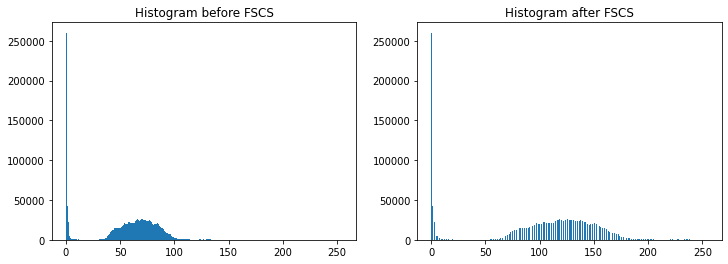

In [ ]:
# Apply FSCS to the image
fscs_img = FSCS(img)

# Print the minimum and maximum pixel values before and after applying FSCS
print(f'Before FSCS: Min = {np.min(img)}, Max = {np.max(img)}')
print(f'After FSCS: Min = {np.min(fscs_img)}, Max = {np.max(fscs_img)}')

# Plot the histogram of the image before and after applying FSCS
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(img.ravel(), bins=256, range=(0, 255))
plt.title('Histogram before FSCS')
plt.subplot(1, 2, 2)
plt.hist(fscs_img.ravel(), bins=256, range=(0, 255))
plt.title('Histogram after FSCS')
plt.show()



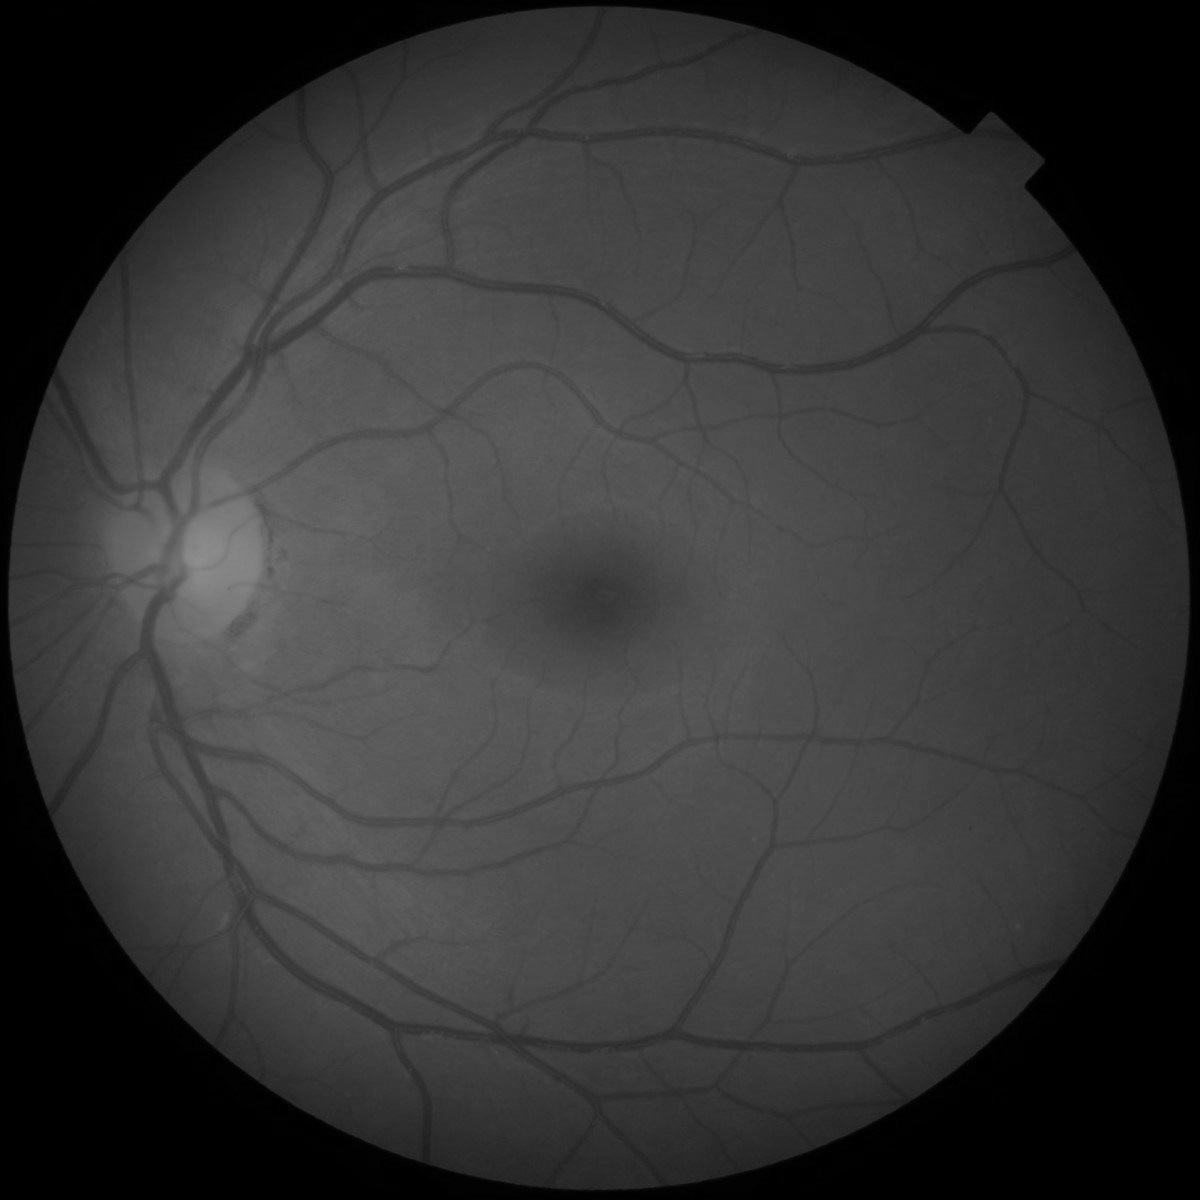

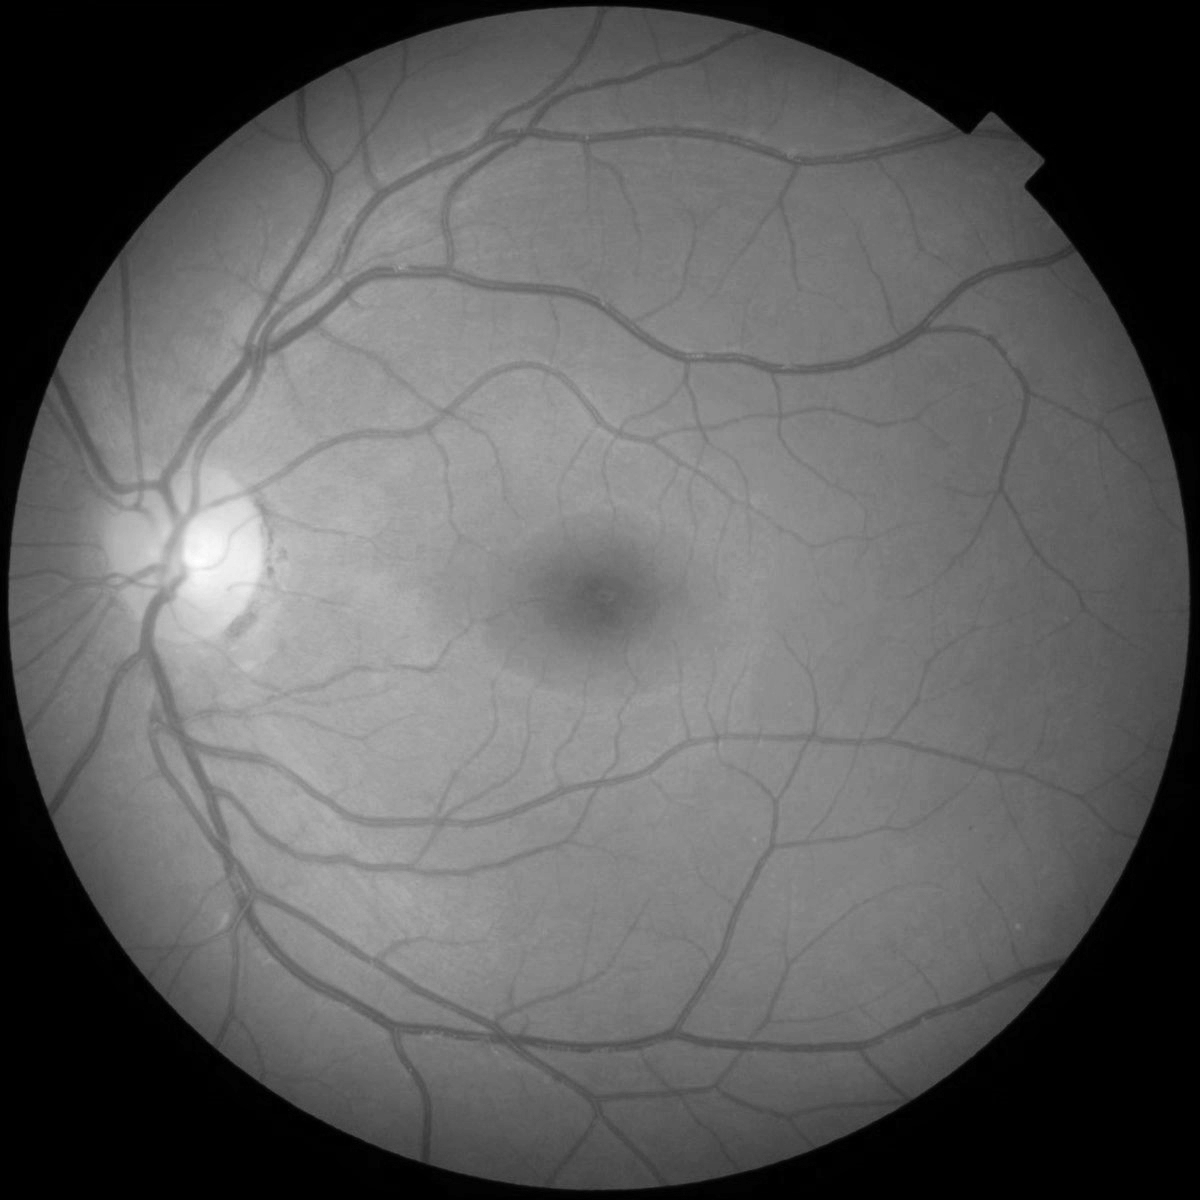

In [ ]:
# Display the original and FSCS images
cv2_imshow(img)
cv2_imshow(fscs_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# **Q1)2) Imagine you have an image taken in low light levels and which, as a result, has low contrast What are the advantages of using contrast stretching to improve the contrast, rather than simply scaling the image by a factor of, say, three?**

**ANSWER :** Contrast stretching is a simple image enhancement technique that attempts to improve the contrast in an image by 'stretching' the range of intensity values it contains to span a desired range of values, the full range of pixel values that the image type concerned allows.
Whereas image zooming using interpolation doesn't necesarily use all the desired range of intensity values given by the bit represenation of the image. Instead it either uses nearest neigher or bilinear calculation that uses the set of intensity values that the already presnt image has or does not use all the intensity values.

Hence for low light level images to expand the contrast streching is the best that scales the image intensity upto 1 to L.

# **Q1)3 Histogram Equalization**

In [ ]:
img = cv2.imread('/content/drive/MyDrive/CS608/HW_2/data/eye.png',0)
img_want = cv2.imread('/content/drive/MyDrive/CS608/HW_2/data/eyeref.png',0)

In [ ]:
#cv2_imshow(img)

In [ ]:
def histogram(img):
  h = [0]*256                      
  for x in range(img.shape[0]):        
    for y in range(img.shape[1]):            
      i = img[x,y]                  
      h[i] = h[i] + 1

  return h

In [ ]:
def plot(hist):
  fig = plt.figure(figsize = (10, 5))
  plt.bar(list(range(256)), hist, color ='black',width = 1.4)
  plt.xlabel('Intensity values')
  plt.ylabel('Frequency of each Intensity value')
  plt.title('Histogram of an image')
  plt.show()

In [ ]:
hist = histogram(img)

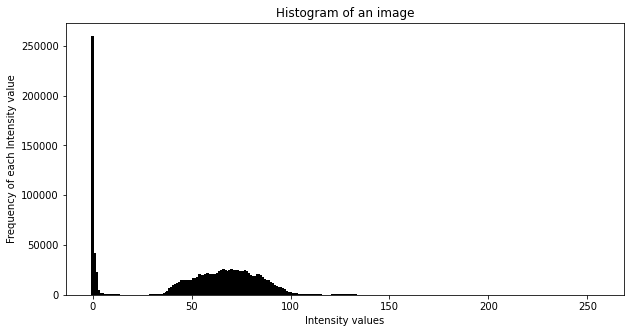

In [ ]:
plot(hist)

In [ ]:
def equalize_histogram(img, histo, L):
    eq_histo = np.zeros_like(histo)
    en_img = np.zeros_like(img)
    for i in range(len(histo)):
        eq_histo[i] = int((L - 1) * np.sum(histo[0:i]))
    # print_histogram(eq_histo, name="eq_"+str(index), title="Equalized Histogram")
    # '''enhance image as well:'''
    for x_pixel in range(img.shape[0]):
        for y_pixel in range(img.shape[1]):
            pixel_val = int(img[x_pixel, y_pixel])
            en_img[x_pixel, y_pixel] = eq_histo[pixel_val]
    '''creating new histogram'''
    hist_img = histogram(en_img)
    # print_img(img=en_img, histo_new=hist_img, histo_old=histo, index=str(index), L=L)
    return eq_histo, en_img

In [ ]:
eq_hist, en_img = equalize_histogram(img,hist,256)

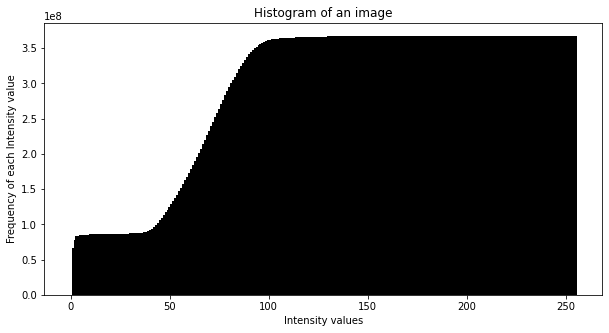

In [ ]:
plot(eq_hist)

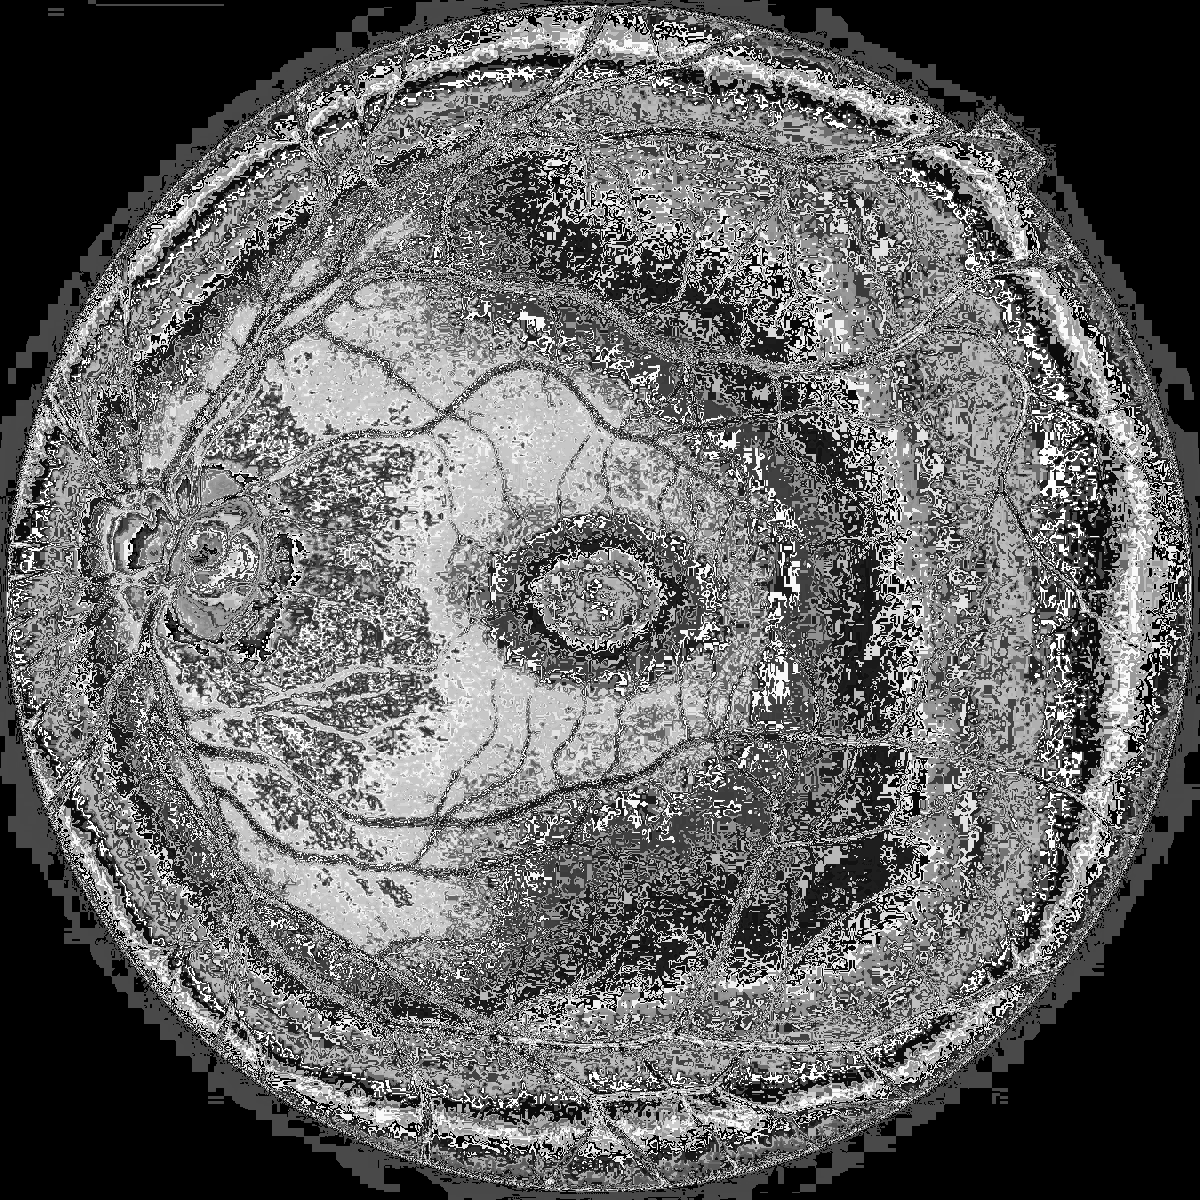

In [ ]:
cv2_imshow(en_img)

# **Q1)4**

# **Histogram Matching**

In [ ]:
def histogram_matching(image, reference):
    # Calculate the histogram of the input image and the reference image
    hist_input, _ = np.histogram(image.flatten(), 256, [0, 256])
    hist_ref, _ = np.histogram(reference.flatten(), 256, [0, 256])

    # Calculate the cumulative distribution function (CDF) of the input image and the reference image
    cdf_input = hist_input.cumsum()
    cdf_ref = hist_ref.cumsum()

    # Normalize the CDFs to the range [0, 1]
    cdf_input_normalized = cdf_input / cdf_input.max()
    cdf_ref_normalized = cdf_ref / cdf_ref.max()

    # Compute the lookup table to map the intensity values of the input image to the reference image
    lut = np.interp(cdf_input_normalized, cdf_ref_normalized, np.arange(256))

    # Apply the lookup table to the input image
    output = cv2.LUT(image, lut.astype('uint8'))

    return output


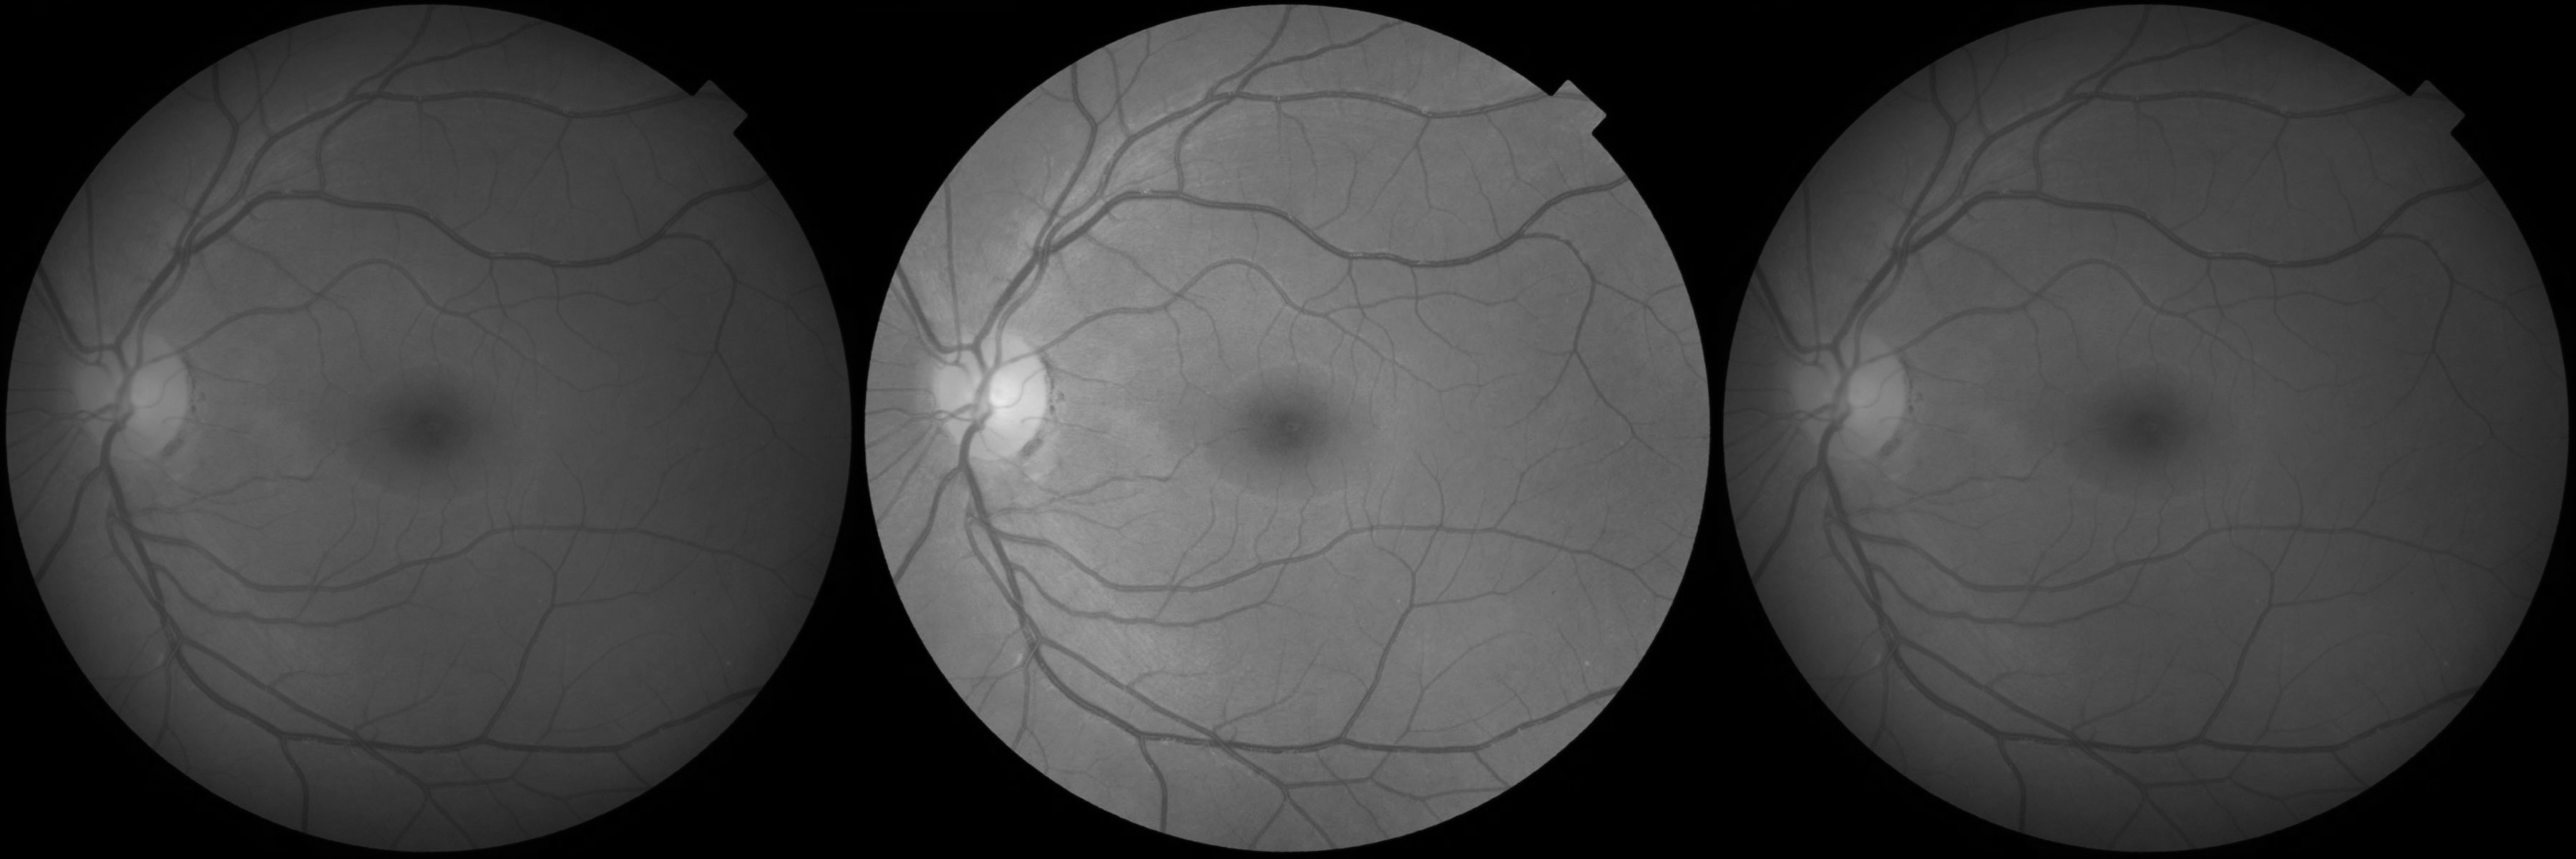

-1

In [ ]:
img_input = cv2.imread('/content/drive/MyDrive/CS608/HW_2/data/eye.png',0)
img_ref = cv2.imread('/content/drive/MyDrive/CS608/HW_2/data/eyeref.png',0)
# Apply histogram matching to the input image using the reference image
matched_img = histogram_matching(img_input, img_ref)

# Display the original, reference, and matched images
Hori = np.concatenate((img_input, img_ref, matched_img), axis=1)
cv2_imshow(Hori)
cv2.waitKey(0)

# **Q2) Image filtering**

In [ ]:
def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

# **Q2)1)**

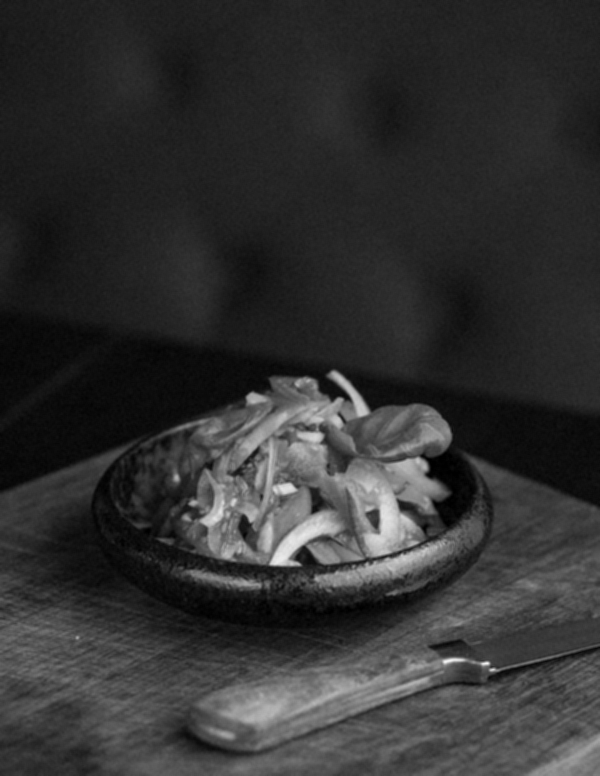

PSNR: 36.21


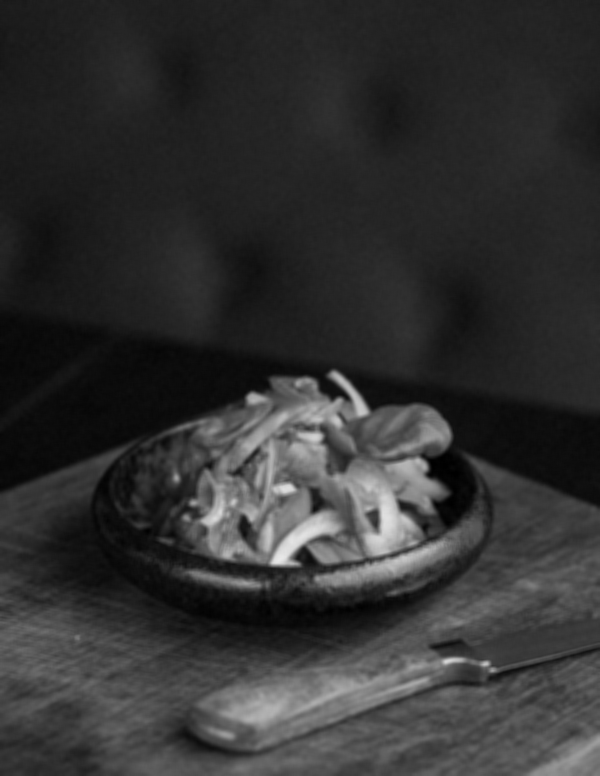

PSNR: 32.76


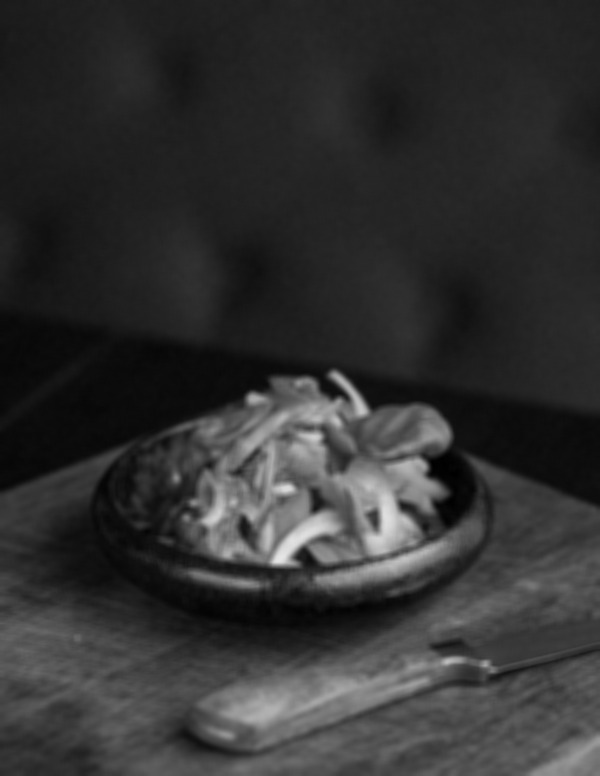

PSNR: 30.92


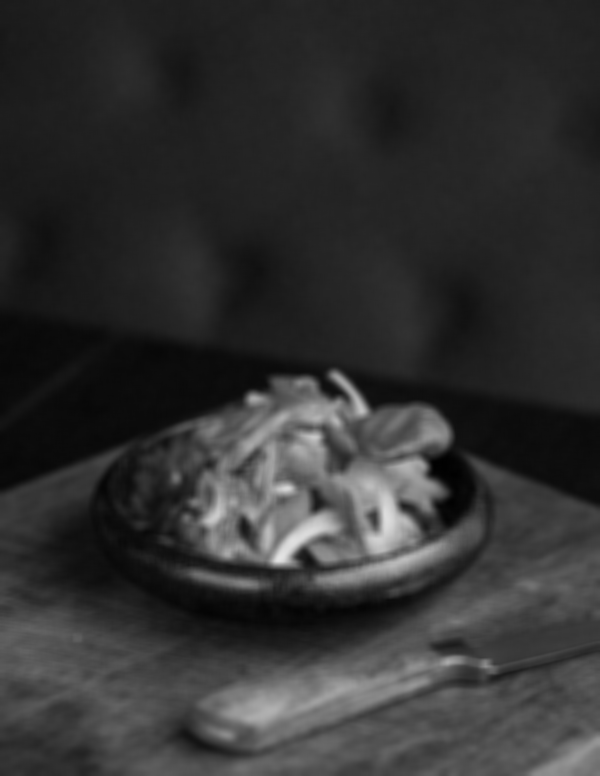

PSNR: 29.67


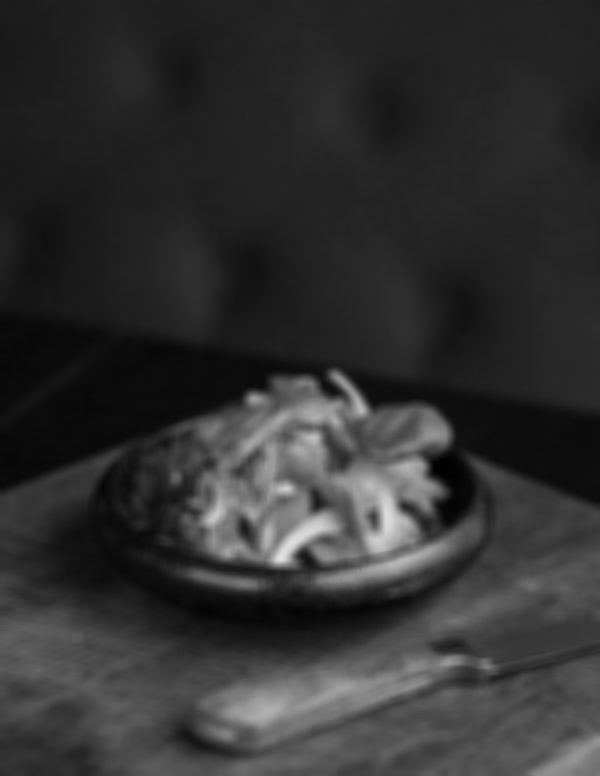

PSNR: 28.71


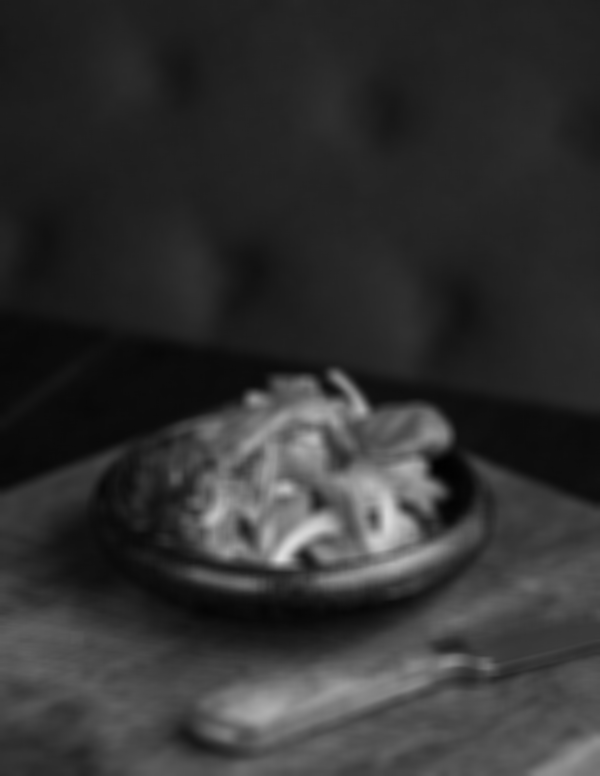

PSNR: 27.95


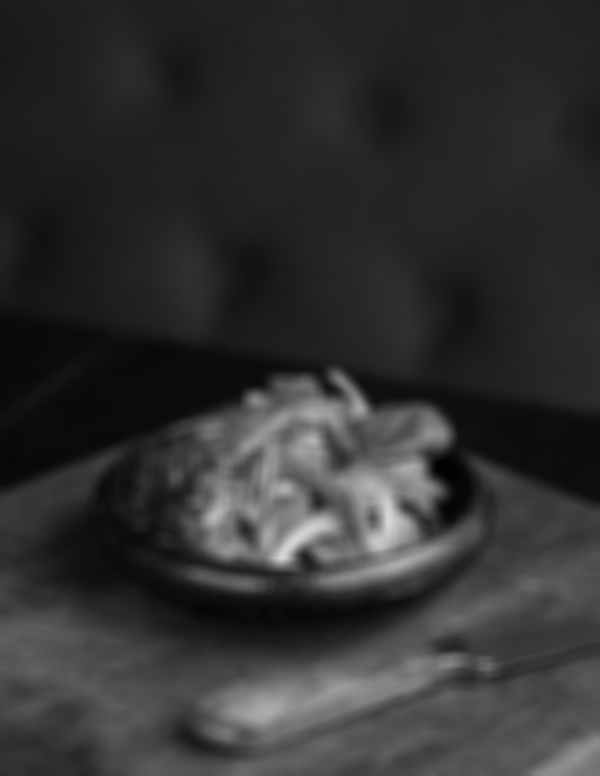

PSNR: 27.32


In [ ]:
# Load the original image
img = cv2.imread('/content/drive/MyDrive/CS608/HW_1_data/food6.jpeg', cv2.IMREAD_GRAYSCALE)

# Add AWGN with zero mean and variance 25
noise = np.random.normal(0, 5, img.shape)
noisy_img = img + noise

# Loop through different window sizes and apply the Average filter
for M in range(3, 16, 2):
    # Define the kernel for the Average filter
    kernel = np.ones((M, M), np.float32) / (M*M)
    
    # Apply the filter using convolution
    filtered_img = cv2.filter2D(noisy_img, -1, kernel)
    
    # Display the denoised image
    cv2_imshow(filtered_img)
    d = psnr(img, filtered_img)
    print(f'PSNR: {d:.2f}')
    # Wait for user input before showing the next image
    cv2.waitKey(0)
    
# Calculate the PSNR of the denoised image compared to the original image
#psnr = cv2.PSNR(filtered_img, img)
# d = psnr(img, filtered_img)
# print(f'PSNR: {d:.2f}')

# Close all windows
cv2.destroyAllWindows()

The appropriate window size for denoising an image with AWGN of variance σ^2 = 25 depends on various factors, including the characteristics of the noise and the details in the image that need to be preserved.

In general, larger window sizes would reduce more noise but also smooth out more details, while smaller window sizes would preserve more details but leave more noise. Therefore, it's recommended to experiment with different window sizes and evaluate the results based on visual inspection and quantitative measures such as PSNR.

For this specific case with AWGN of variance σ^2 = 25, a reasonable range of window sizes to try could be between 3x3 and 15x15. In practice, a window size around 3x3 or 5x5 as seen above, provide a good balance between noise reduction and detail preservation for many images and applications. Also on evaluating PSNR of different window sizes, 3x3 and 5x5 seems much better in comparsion to the rest.

# **Q2)2**

In [ ]:
# Load the original image
img = cv2.imread('/content/drive/MyDrive/CS608/HW_1_data/food2.jpeg', cv2.IMREAD_GRAYSCALE)

# Add AWGN with zero mean and variance 25
noise = np.random.normal(0, 5, img.shape)
noisy_img = img + noise

# Loop through different standard deviations and apply the Gaussian filter
for h in np.arange(0.5, 5.5, 0.5):
    # Define the kernel for the Gaussian filter
    kernel = cv2.getGaussianKernel(5, h)
    kernel_2d = np.outer(kernel, kernel.transpose())
    
    # Apply the filter using convolution
    filtered_img = cv2.filter2D(noisy_img, -1, kernel_2d)
    d = psnr(img, filtered_img)
    print(f'PSNR: {d:.2f}')
    # Display the denoised image
    cv2_imshow(filtered_img)
    
    # Wait for user input before showing the next image
    cv2.waitKey(0)
    
# Calculate the PSNR of the denoised image compared to the original image
# psnr = cv2.PSNR(filtered_img, img)
# print(f'PSNR: {psnr:.2f}')

# Close all windows
cv2.destroyAllWindows()

Output hidden; open in https://colab.research.google.com to view.

In this code, we add AWGN with variance 25 to the original image, and loop through different standard deviations (h) ranging from 0.5 to 5 in steps of 0.5. We define the kernel for the Gaussian filter using cv2.getGaussianKernel and create a 2D kernel by taking the outer product of the 1D kernel with its transpose. We apply the filter to the noisy image using convolution and display the denoised image for each standard deviation. We calculate the PSNR of the last denoised image compared to the original image.

The effect of different standard deviations on denoising can be observed by comparing the denoised images. A smaller standard deviation would result in less smoothing and more detail preservation, but may also leave more noise. A larger standard deviation would result in more smoothing and less detail preservation, but may also reduce more noise. Therefore, it's recommended to experiment with different standard deviations and evaluate the results based on visual inspection and quantitative measures such as PSNR. **bold text**

# **Q2)3**
# Median filter of size M × M. Vary M from 3 to 15 in increments of 2 and observe the tradeoff between denoising and smoothing. What could be an appropriate window size for this noise level?

In [ ]:
from scipy.ndimage import median_filter
# Load the original image
img = cv2.imread('/content/drive/MyDrive/CS608/HW_1_data/food10.jpeg',0)
# Add AWGN with zero mean and variance 25
noise = np.random.normal(0, 5, img.shape)
noisy_img = img + noise

# Loop through different window sizes and apply the Average filter
for M in range(3, 16, 2):
    
    denoised_img = median_filter(noisy_img, size=M)
    d = psnr(img, denoised_img)
    print("for filter ",M,"x",M)
    print(f'PSNR: {d:.2f}')
    fig, axs = plt.subplots(1, 3,figsize=(25,24))
    axs[0].imshow(img, cmap="gray")
    axs[0].set_title("Original Image")
    axs[1].imshow(noisy_img, cmap="gray")
    axs[1].set_title("Noisy Image")
    axs[2].imshow(denoised_img, cmap="gray")
    axs[2].set_title("Denoised Image")
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

# **As seen with the results above the appropriate window size for the noise level applied to the food10.jpeg is 3x3 and 5x5. As the window size increased the PSNR decreases. Also with large window size the image is too much smoothened and details are lost and it seems blur.**

# **Q2)4) Sobel and Prewwit Operators**

In [ ]:
def sobel_edge_detection(image):
    # Convert the image to grayscale
    #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(image, (3, 3), 0)

    # Apply Sobel operator in x and y directions
    sobelx = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)

    # Compute the gradient magnitude and normalize the values to the range [0, 255]
    gradient = np.sqrt(sobelx**2 + sobely**2)
    gradient = cv2.normalize(gradient, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

    return gradient

In [ ]:
def prewitt_edge_detection(image):
    # Convert the image to grayscale
    #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(image, (3, 3), 0)

    # Apply Prewitt operator in x and y directions
    kernelx = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
    kernely = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    prewittx = cv2.filter2D(blurred, -1, kernelx)
    prewitty = cv2.filter2D(blurred, -1, kernely)

    # Compute the gradient magnitude and normalize the values to the range [0, 255]
    gradient = np.sqrt(prewittx**2 + prewitty**2)
    gradient = cv2.normalize(gradient, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

    return gradient

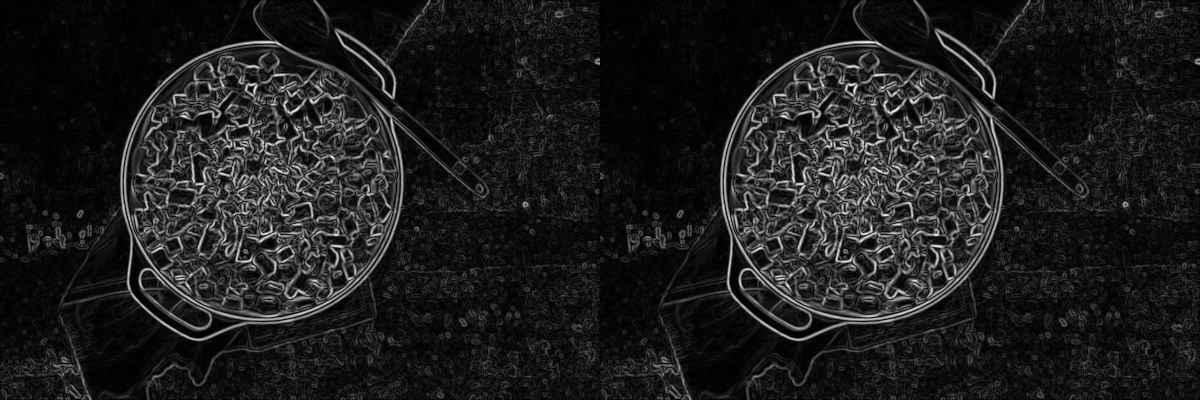

-1

In [ ]:
# Load the image
img = cv2.imread('/content/drive/MyDrive/CS608/HW_1_data/food9.jpeg',0)
img = img.astype('float32')
# Apply Sobel edge detection
sobel_edge = sobel_edge_detection(img)

# Apply Prewitt edge detection
prewitt_edge = prewitt_edge_detection(img)

# Display the original and edge-detected images
# cv2.imshow('Original Image', img)
# cv2.imshow('Sobel Edge Detection', sobel_edge)
# cv2.imshow('Prewitt Edge Detection', prewitt_edge)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
Hori = np.concatenate((sobel_edge, prewitt_edge), axis=1)
cv2_imshow(Hori)
cv2.waitKey(0)

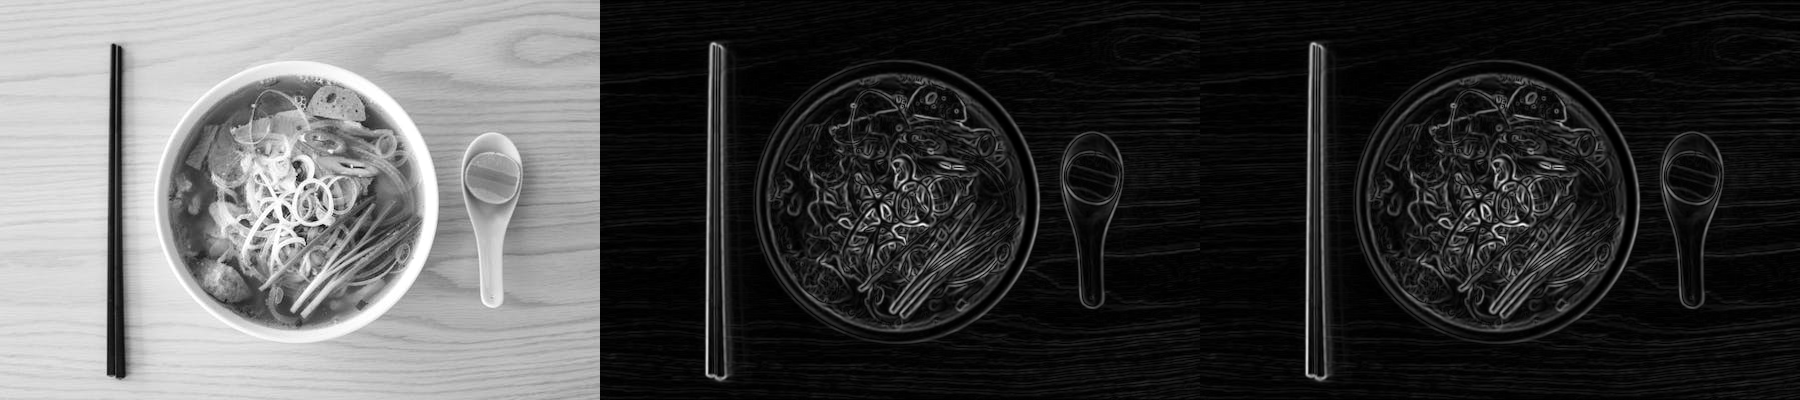

-1

In [ ]:
# Load the image
img = cv2.imread('/content/drive/MyDrive/CS608/HW_1_data/food10.jpeg',0)
img = img.astype('float32')
# Apply Sobel edge detection
sobel_edge = sobel_edge_detection(img)

# Apply Prewitt edge detection
prewitt_edge = prewitt_edge_detection(img)

Hori = np.concatenate((img, sobel_edge, prewitt_edge), axis=1)
cv2_imshow(Hori)
cv2.waitKey(0)

# **Q2) 5) Estimate gradient magnitude**
# **Q5) a)**

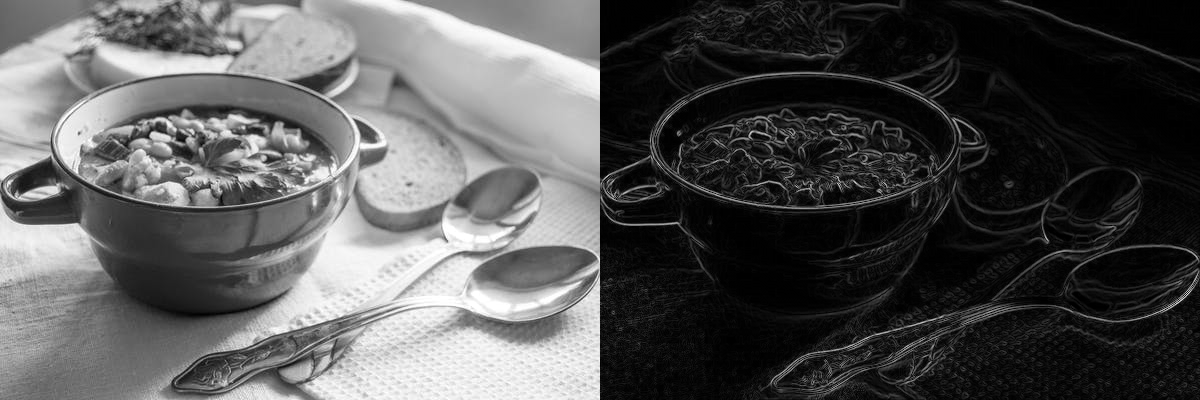

-1

In [ ]:
# Load the image
img = cv2.imread('/content/drive/MyDrive/CS608/HW_1_data/food11.jpeg', cv2.IMREAD_GRAYSCALE)
img = img.astype('float32')

# Compute the horizontal and vertical gradients
dx_kernel = np.array([[-1, 0, 1]])
dy_kernel = np.array([[-1], [0], [1]])
dx = convolve(img, dx_kernel)
dy = convolve(img, dy_kernel)

# Compute the gradient magnitude
M = np.sqrt(dx**2 + dy**2)
# Display the gradient magnitude
Hori = np.concatenate((img, M), axis=1)
cv2_imshow(Hori)
cv2.waitKey(0)


# **Q2) 5) b)**

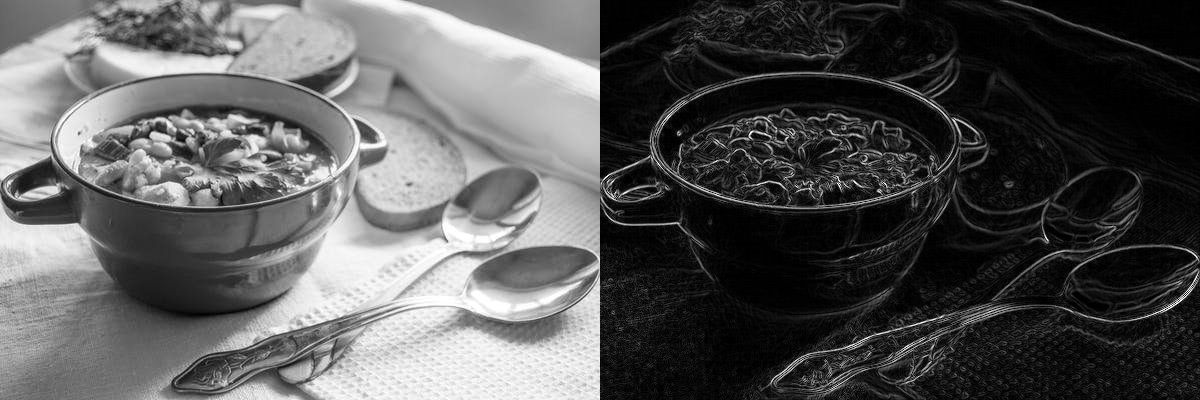

-1

In [ ]:
# Load the image
img = cv2.imread('/content/drive/MyDrive/CS608/HW_1_data/food11.jpeg', cv2.IMREAD_GRAYSCALE)
img = img.astype('float32')
# Compute the horizontal and vertical gradients
dx_kernel = np.array([[-1, 0, 1]])
dy_kernel = np.array([[-1], [0], [1]])
dx = convolve(img, dx_kernel)
dy = convolve(img, dy_kernel)

# Compute the gradient magnitude
M = np.abs(dx) + np.abs(dy)

# Display the gradient magnitude
Hori = np.concatenate((img, M), axis=1)
cv2_imshow(Hori)
cv2.waitKey(0)

# **Q2)5) c)**

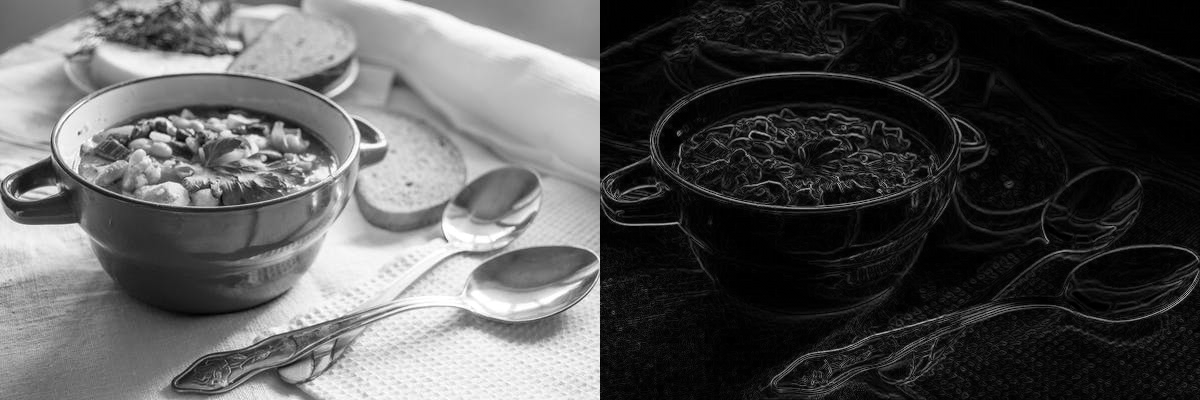

-1

In [ ]:
# Load the image
img = cv2.imread('/content/drive/MyDrive/CS608/HW_1_data/food11.jpeg', cv2.IMREAD_GRAYSCALE)
img = img.astype('float32')
# Compute the horizontal and vertical gradients
dx_kernel = np.array([[-1, 0, 1]])
dy_kernel = np.array([[-1], [0], [1]])
dx = convolve(img, dx_kernel)
dy = convolve(img, dy_kernel)

# Compute the gradient magnitude
M = np.maximum(np.abs(dx), np.abs(dy))

# Display the gradient magnitude
Hori = np.concatenate((img, M), axis=1)
cv2_imshow(Hori)
cv2.waitKey(0)

# **Q2) 6)Laplacian Edge Detectors:**

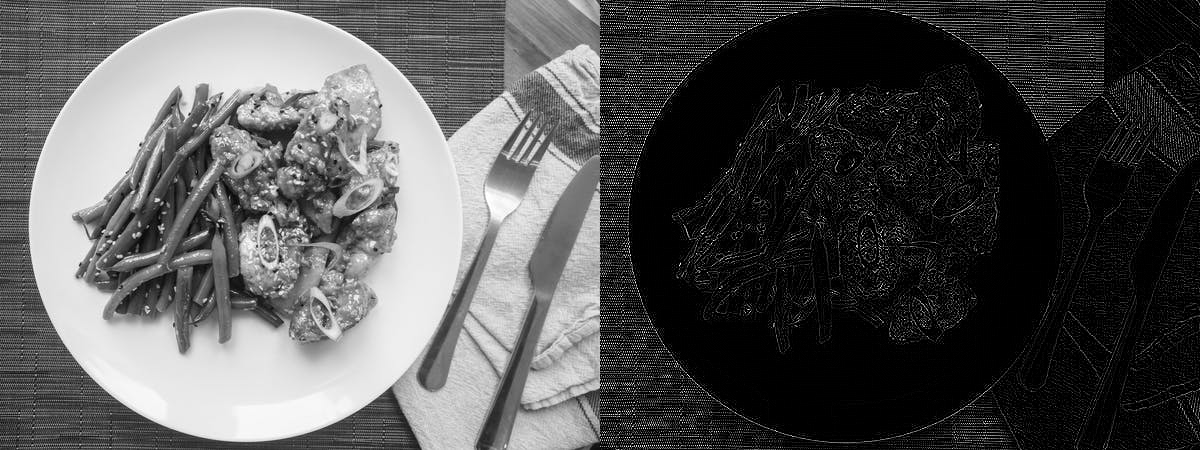

In [ ]:
# Load the input image
img = cv2.imread('/content/drive/MyDrive/CS608/HW_1_data/food3.jpeg', cv2.IMREAD_GRAYSCALE)

# Define the Laplacian kernel
laplacian_kernel = np.array([[0, 1, 0],
                             [1, -4, 1],
                             [0, 1, 0]])

# Apply the Laplacian kernel to the image using convolution
laplacian = cv2.filter2D(img, -1, laplacian_kernel)

# Display the result
Hori = np.concatenate((img, laplacian), axis=1)
cv2_imshow(Hori)

# **Q2) 7) Compute the edge map E as the output of a zero crossing detector.**

Zero crossings


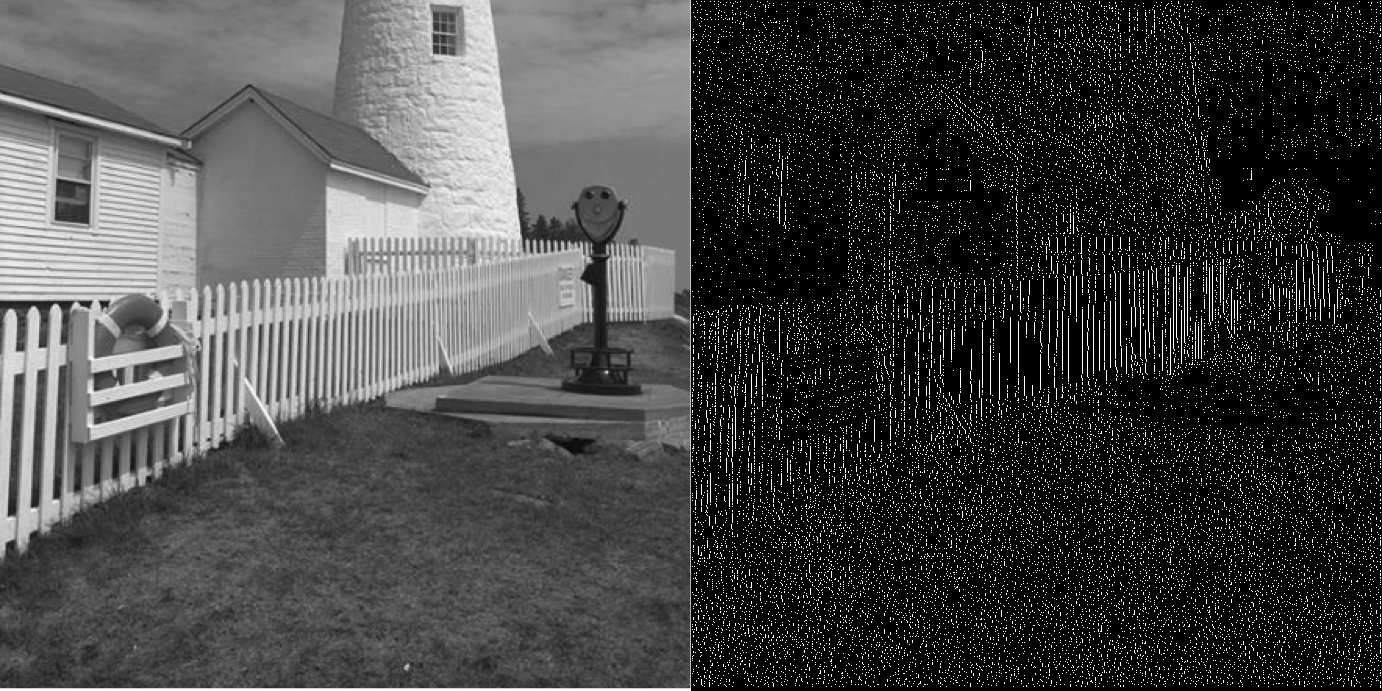

In [ ]:
# Load the input image
img = cv2.imread('/content/drive/MyDrive/CS608/HW_2/data/lighthouse.png',0)


# Compute the Laplacian
laplacian_kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
laplacian = cv2.filter2D(img, -1, laplacian_kernel)

# Apply a threshold to the Laplacian to create a binary image
threshold_value = 0  # Adjust this value to control the sensitivity of the edge detection
binary = cv2.threshold(laplacian, threshold_value, 255, cv2.THRESH_BINARY)[1]

# Find the zero crossings in the binary image
zero_crossings = np.zeros(binary.shape, dtype=np.uint8)
for i in range(1, binary.shape[0] - 1):
    for j in range(1, binary.shape[1] - 1):
        if binary[i, j] == 255:
            # Check for a zero crossing in the 8 neighboring pixels
            neighbors = binary[i-1:i+2, j-1:j+2].flatten()
            if ((neighbors[0] == 0 and neighbors[7] == 0 and
                 neighbors[1] == 255 and neighbors[6] == 255) or
                (neighbors[2] == 0 and neighbors[5] == 0 and
                 neighbors[3] == 255 and neighbors[4] == 255)):
                zero_crossings[i, j] = 255

# Display the result
print("Zero crossings")
Hori = np.concatenate((img, zero_crossings), axis=1)
cv2_imshow(Hori)

# **Q2) 8) LoG**

for sigma:  1


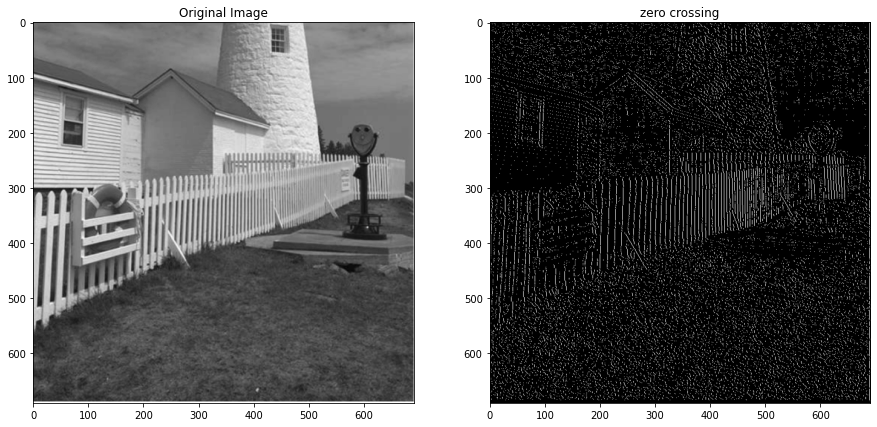

for sigma:  3


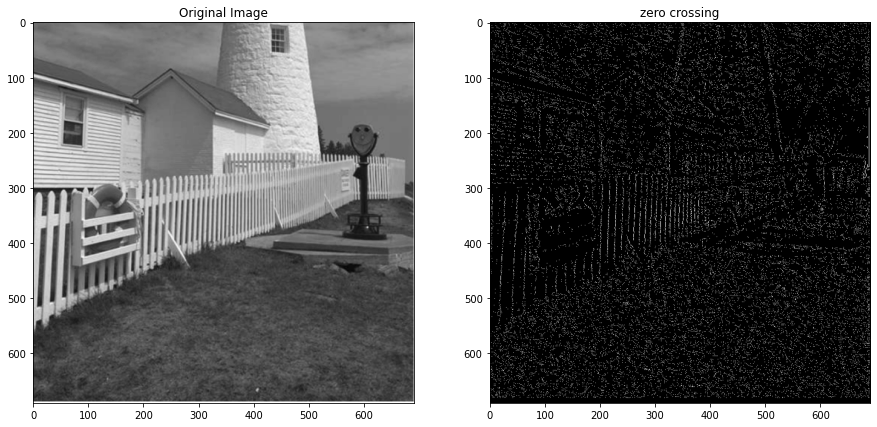

for sigma:  5


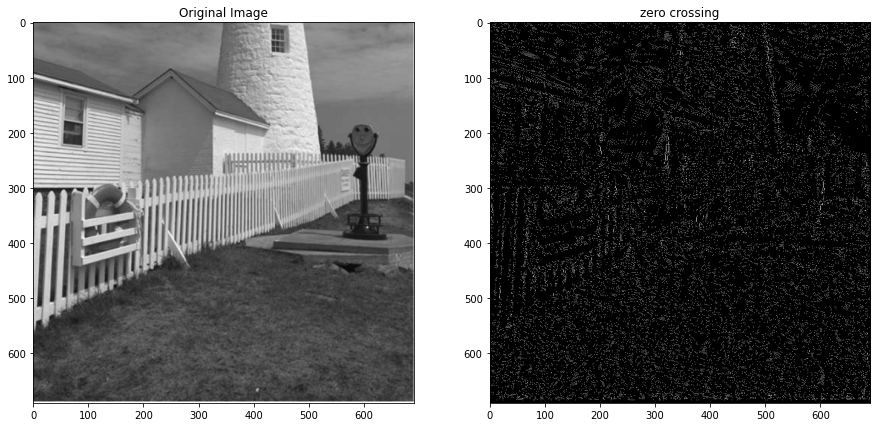

In [ ]:
# Load the input image
img = cv2.imread('/content/drive/MyDrive/CS608/HW_2/data/lighthouse.png',0)
zero_crossings_1 = np.zeros(binary.shape, dtype=np.uint8)
# Define a range of sigma values for the Gaussian pre-filter
sigma_values = [1, 3, 5]

# Compute the Laplacian of Gaussian for each sigma value
for sigma in sigma_values:
    # Apply the Gaussian pre-filter
    blur = cv2.GaussianBlur(img, (0, 0), sigma)
    # Compute the Laplacian using the Laplacian of Gaussian formula
    laplacian = cv2.Laplacian(blur, cv2.CV_64F)

    # Find the zero crossings in the Laplacian image
    threshold_value = 0
    binary = cv2.threshold(laplacian, threshold_value, 255, cv2.THRESH_BINARY)[1]
    zero_crossings = np.zeros(binary.shape, dtype=np.uint8)
    for i in range(1, binary.shape[0] - 1):
        for j in range(1, binary.shape[1] - 1):
            if binary[i, j] == 255:
                neighbors = binary[i-1:i+2, j-1:j+2].flatten()
                if ((neighbors[0] == 0 and neighbors[7] == 0 and
                     neighbors[1] == 255 and neighbors[6] == 255) or
                    (neighbors[2] == 0 and neighbors[5] == 0 and
                     neighbors[3] == 255 and neighbors[4] == 255)):
                    zero_crossings[i, j] = 255
    if sigma == 1:
      zero_crossings_1 = zero_crossings
    # Display the result
    print( "for sigma: ",sigma)
    fig, axs = plt.subplots(1, 2,figsize=(15,20))
    axs[0].imshow(img, cmap="gray")
    axs[0].set_title("Original Image")
    axs[1].imshow(zero_crossings, cmap="gray")
    axs[1].set_title("zero crossing")
    plt.show()


The sensitivity of the edge detector can be adjusted by changing the sigma value.

By testing different sigma values, you can observe the robustness of LoG edge detector to different levels of noise in the input image. Larger sigma values will result in a smoother pre-filtered image, which can be useful for reducing noise, but may also cause loss of detail in the edge map. Conversely, smaller sigma values will preserve more detail in the edge map, but may also produce more noise.

# For Comparing the result of LoG with gradient based techniques implemented above we use one gradient based techniques in Q2) 5)c) with the same lighthouse.png image for fair comparison

In [ ]:
# Load the image
img = cv2.imread('/content/drive/MyDrive/CS608/HW_2/data/lighthouse.png',0)
img = img.astype('float32')
# Compute the horizontal and vertical gradients
dx_kernel = np.array([[-1, 0, 1]])
dy_kernel = np.array([[-1], [0], [1]])
dx = convolve(img, dx_kernel)
dy = convolve(img, dy_kernel)

# Compute the gradient magnitude
M = np.maximum(np.abs(dx), np.abs(dy))

# Display the gradient magnitude
# Hori = np.concatenate((img, M), axis=1)
# cv2_imshow(Hori)

# To compare zero crossing image with sigma = 1 and gradient based technique used in Q2)5)c) on the same lighthouse.png

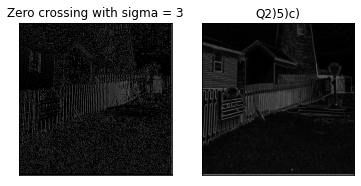

In [ ]:
# Hori = np.concatenate((zero_crossings_3, M), axis=1)
# cv2_imshow(Hori)
plt.subplot(121), plt.imshow(zero_crossings_1, cmap='gray')
plt.title('Zero crossing with sigma = 3'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(M, cmap='gray')
plt.title('Q2)5)c)'), plt.xticks([]), plt.yticks([])
plt.show()

Here gradient method used in Q2)5)c) seems better as no gaussian noise is added. But to LoG, gaussian noise is added.
But as the same time LoG is able to distinguish the fences in the image better than gradient method in Q2)5)c.

# **Q3)1 program, that implements the DFT/IDFT pair using first principles i.e., as a summation over two dimensions.**

# **Using parallel for loops**


In [ ]:
from numba import jit, prange

@jit(parallel=True)
def dft2d(f):
    """Compute the 2D DFT of an image using a parallel for loop."""
    N, M = f.shape
    F = np.zeros((N, M), dtype=np.complex128)
    for k in prange(N):
        for l in prange(M):
            for m in prange(N):
                for n in prange(M):
                    F[k, l] += f[m, n] * np.exp(-2j * np.pi * ((k * m) / N + (l * n) / M))
    return F

@jit(parallel=True)
def idft2d(F):
    """Compute the 2D IDFT of an image using a parallel for loop."""
    N, M = F.shape
    f = np.zeros((N, M), dtype=np.complex128)
    for m in prange(N):
        for n in prange(M):
            for k in prange(N):
                for l in prange(M):
                    f[m, n] += F[k, l] * np.exp(2j * np.pi * ((k * m) / N + (l * n) / M))
            f[m, n] /= N * M
    return f


# **Q3)2) Display the image, its DFT magnitude, phase, DFT magnitude subject to the logarithmic transformation**

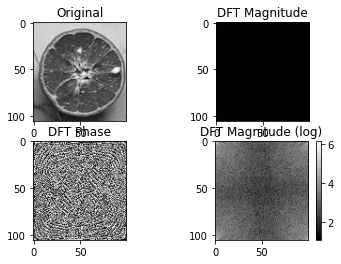

In [ ]:
# Load an image
img1 = cv2.imread('/content/drive/MyDrive/CS608/HW_1_data/square_2_crop.jpeg',0)

# Compute the DFT
F1 = dft2d(img1)

# Compute the IDFT
f1 = idft2d(F1)
# Display the original image, DFT magnitude, phase, and logarithmic DFT magnitude
plt.subplot(2, 2, 1)
plt.imshow(img1, cmap="gray")
plt.title("Original")

plt.subplot(2, 2, 2)

plt.imshow(np.abs(F1), cmap="gray")
plt.title("DFT Magnitude")
plt.subplot(2, 2, 3)

plt.imshow(np.angle(F1), cmap="gray")
plt.title("DFT Phase")

plt.subplot(2, 2, 4)
plt.imshow(np.log10(1 + np.abs(F1)), cmap="gray")
plt.title("DFT Magnitude (log)")
plt.colorbar()

plt.show()

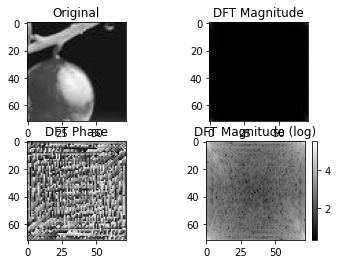

In [ ]:
# Load an image
img2 = cv2.imread('/content/drive/MyDrive/CS608/HW_1_data/crop1.jpeg',0)

# Compute the DFT
F2 = dft2d(img2)

# Compute the IDFT
f2 = idft2d(F2)
# Display the original image, DFT magnitude, phase, and logarithmic DFT magnitude
plt.subplot(2, 2, 1)
plt.imshow(img2, cmap="gray")
plt.title("Original")

plt.subplot(2, 2, 2)

plt.imshow(np.abs(F2), cmap="gray")
plt.title("DFT Magnitude")
plt.subplot(2, 2, 3)

plt.imshow(np.angle(F2), cmap="gray")
plt.title("DFT Phase")

plt.subplot(2, 2, 4)
plt.imshow(np.log10(1 + np.abs(F2)), cmap="gray")
plt.title("DFT Magnitude (log)")
plt.colorbar()

plt.show()

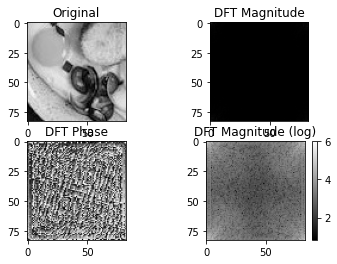

In [ ]:
# Load an image
img3 = cv2.imread('/content/drive/MyDrive/CS608/HW_1_data/crop2.jpeg',0)

# Compute the DFT
F3 = dft2d(img3)

# Compute the IDFT
f3 = idft2d(F3)
# Display the original image, DFT magnitude, phase, and logarithmic DFT magnitude
plt.subplot(2, 2, 1)
plt.imshow(img3, cmap="gray")
plt.title("Original")

plt.subplot(2, 2, 2)

plt.imshow(np.abs(F3), cmap="gray")
plt.title("DFT Magnitude")
plt.subplot(2, 2, 3)

plt.imshow(np.angle(F3), cmap="gray")
plt.title("DFT Phase")

plt.subplot(2, 2, 4)
plt.imshow(np.log10(1 + np.abs(F3)), cmap="gray")
plt.title("DFT Magnitude (log)")
plt.colorbar()

plt.show()

# **Q3) 3) Verify that IDFT[DFT[I]] = I.**

<ipython-input-90-247034464b4a>:2: ComplexWarning: Casting complex values to real discards the imaginary part
  filtered_img = filtered_img.astype(np.uint8)


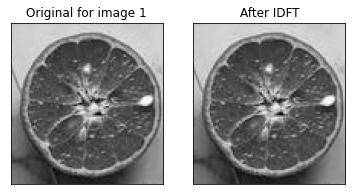

In [ ]:
filtered_img = f1 / np.max(f1) * 255
filtered_img = filtered_img.astype(np.uint8)
plt.subplot(121), plt.imshow(img1, cmap='gray')
plt.title('Original for image 1'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(filtered_img, cmap='gray')
plt.title('After IDFT'), plt.xticks([]), plt.yticks([])
plt.show()

<ipython-input-91-4995af1017ca>:2: ComplexWarning: Casting complex values to real discards the imaginary part
  filtered_img = filtered_img.astype(np.uint8)


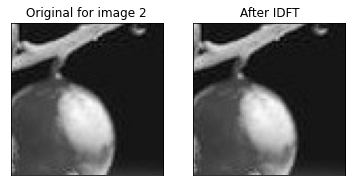

In [ ]:
filtered_img = f2 / np.max(f2) * 255
filtered_img = filtered_img.astype(np.uint8)
plt.subplot(121), plt.imshow(img2, cmap='gray')
plt.title('Original for image 2'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(filtered_img, cmap='gray')
plt.title('After IDFT'), plt.xticks([]), plt.yticks([])
plt.show()

<ipython-input-92-6f6731c5ab21>:2: ComplexWarning: Casting complex values to real discards the imaginary part
  filtered_img = filtered_img.astype(np.uint8)


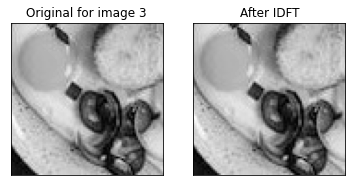

In [ ]:
filtered_img = f3 / np.max(f3) * 255
filtered_img = filtered_img.astype(np.uint8)
plt.subplot(121), plt.imshow(img3, cmap='gray')
plt.title('Original for image 3'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(filtered_img, cmap='gray')
plt.title('After IDFT'), plt.xticks([]), plt.yticks([])
plt.show()

# **Q3)4) Importance of phase**

# by transposing phase

<ipython-input-106-d1e319d21bb8>:11: ComplexWarning: Casting complex values to real discards the imaginary part
  img_new1 = idft2d(F_new).astype(np.uint8)


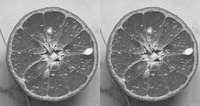

In [ ]:
  # Get the magnitude and phase of the DFT coefficients
mag = np.abs(F1)
phase = np.angle(F1)

# Transpose the phase matrix
phase_T = np.transpose(phase)
# phase_T = phase.T
phase_T = np.transpose(phase_T, (1, 0))
# Synthesize the image using the original magnitude and transposed phase
F_new = mag * np.exp(1j * phase_T)
img_new1 = idft2d(F_new).astype(np.uint8)

# Display the original and synthesized images side by side

Hori = np.concatenate((img1, img_new1), axis=1)
cv2_imshow(Hori)

# filtered_img1 = img_new1 / np.max(img_new1) * 255
# filtered_img1 = filtered_img1.astype(np.uint8)
# plt.subplot(121), plt.imshow(img1, cmap='gray')
# plt.title('Original for image 3'), plt.xticks([]), plt.yticks([])
# plt.subplot(122), plt.imshow(filtered_img1, cmap='gray')
# plt.title('After phase transform'), plt.xticks([]), plt.yticks([])
# plt.show()

# by setting phase = 0

/usr/local/lib/python3.9/dist-packages/google/colab/patches/__init__.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


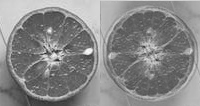

In [ ]:

# Set the phase to zero
F1.imag = np.zeros_like(F1.imag)
# Compute the inverse DFT
new_img2 = idft2d(F1)
# Normalize the image to 0-255
# filtered_img = filtered_img / np.max(filtered_img) * 255
# filtered_img = filtered_img.astype(np.uint8)
# Display the original and filtered images
Hori = np.concatenate((img1, new_img2), axis=1)
cv2_imshow(Hori)


# Add noise in phase

/usr/local/lib/python3.9/dist-packages/google/colab/patches/__init__.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


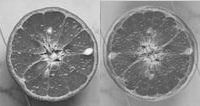

In [ ]:
# Add additive Gaussian noise to the phase of the DFT
noise = np.random.normal(0, 1, size=F1.shape) * np.pi / 4
F1 = F1 + noise
# Compute the inverse DFT
new_img3 = idft2d(F1)
# Normalize the image to 0-255
# filtered_img = filtered_img / np.max(filtered_img) * 255
# filtered_img = filtered_img.astype(np.uint8)
Hori = np.concatenate((img1, new_img3), axis=1)
cv2_imshow(Hori)
# plt.subplot(121), plt.imshow(img1, cmap='gray')
# plt.title('Original'), plt.xticks([]), plt.yticks([])
# plt.subplot(122), plt.imshow(filtered_img, cmap='gray')
# plt.title('Added AGN to phase'), plt.xticks([]), plt.yticks([])
# plt.show()

# **Original, Image after transposing phase, making phase zero, adding noise to phase side by side**

/usr/local/lib/python3.9/dist-packages/google/colab/patches/__init__.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


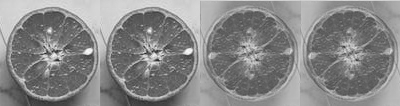

In [ ]:
Hori = np.concatenate((img1, img_new1, new_img2, new_img3), axis=1)
cv2_imshow(Hori)